In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
from warnings import filterwarnings
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

filterwarnings("ignore")


In [2]:
exams=pd.read_csv("exams.csv")
df=exams.copy()

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
color_palette = ['#FFFFFF', '#F9B1B8',
                 '#EE4355', '#B60618', '#820815', '#000000']

corr = df.corr()
fig = go.Figure(data=go.Heatmap(z=corr,
                                x=corr.index.values,
                                y=corr.columns.values,
                                colorscale=color_palette,
                                text=corr.round(2), texttemplate="%{text}"
                                )
                )

fig.update_layout(title_text='<b>Correlation Matrix<b>',
                  title_x=0.5,
                  titlefont={'size': 24, 'family': 'Courier New'},
                  width=600, height=600,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',
                  paper_bgcolor=None,
                  )

fig.show()


In [6]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=('<i>gender', '<i>race/ethnicity',
                    '<i>parental level of education', '<i>test preparation course'))
fig.add_trace(go.Histogram(x=df['gender'], name='gender'), row=1, col=1)
fig.add_trace(go.Histogram(x=df['race/ethnicity'],
              name='race/ethnicity'), row=1, col=2)


fig.update_layout(height=600, width=1000,
                  title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5,
                  font_family='Courier New')


In [7]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=(
    '<i>parental level of education', '<i>test preparation course'))

fig.add_trace(go.Histogram(x=df['parental level of education'],
              name='parental level of education'), row=1, col=1)
fig.add_trace(go.Histogram(
    x=df['test preparation course'], name='test preparation course'), row=1, col=2)


fig.update_layout(height=600, width=1000,
                  title_text='<b>Feature Distribution', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5,
                  font_family='Courier New')


In [8]:
a = df.groupby(['gender']).mean()
a


,math score,reading score,writing score
gender,,,
female,63.196687,71.888199,71.708075
male,69.384913,66.305609,64.029014


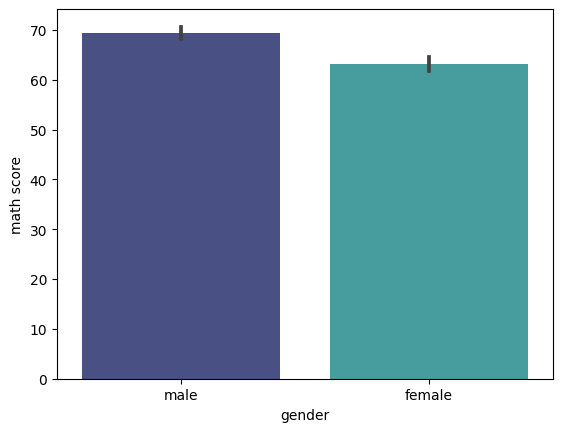

In [9]:
sns.barplot(x="gender", y="math score",data=df,palette="mako");

In [10]:
b = df.groupby(['race/ethnicity']).mean()
b


,math score,reading score,writing score
race/ethnicity,,,
group A,65.215190,68.556962,66.974684
group B,63.170732,67.102439,65.736585
group C,63.130031,66.383901,64.523220
group D,69.267176,72.087786,72.259542
group E,74.465649,72.526718,70.213740


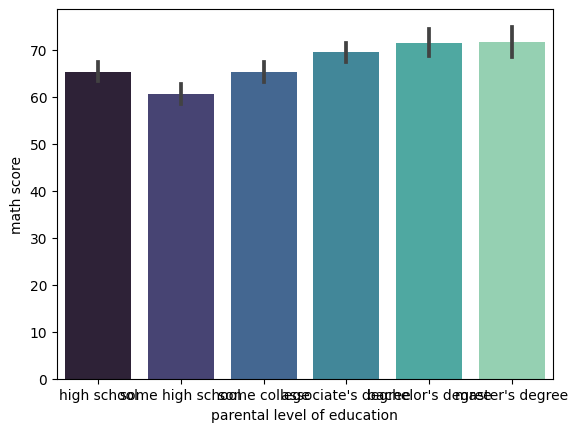

In [11]:
sns.barplot(x="parental level of education", y="math score",data=df,palette="mako");

In [12]:
c = df.groupby(['parental level of education']).mean()
c


,math score,reading score,writing score
parental level of education,,,
associate's degree,69.536946,70.985222,70.113300
bachelor's degree,71.491071,74.008929,74.410714
high school,65.207921,67.400990,64.846535
master's degree,71.585714,75.428571,75.885714
some college,65.297297,68.045045,66.734234
some high school,60.701571,64.408377,62.539267


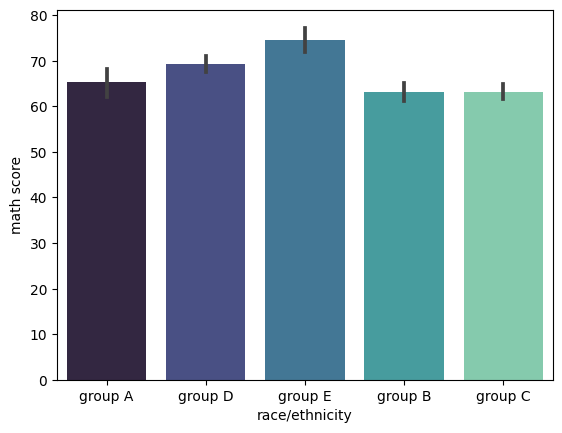

In [13]:
sns.barplot(x="race/ethnicity", y="math score",data=df,palette="mako");

In [14]:
d = df.groupby(['test preparation course']).mean()
d


,math score,reading score,writing score
test preparation course,,,
completed,69.686567,74.089552,74.671642
none,64.738346,66.439098,64.245113


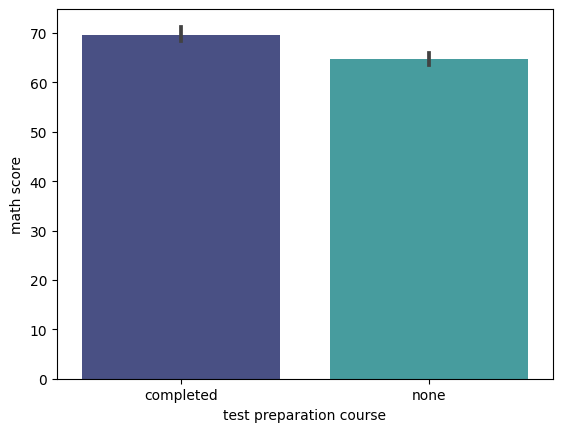

In [15]:
sns.barplot(x="test preparation course", y="math score",data=df,palette="mako");

In [16]:
d = df.groupby(['lunch']).mean()
d


,math score,reading score,writing score
lunch,,,
free/reduced,58.505747,63.189655,60.925287
standard,70.607362,72.104294,71.374233


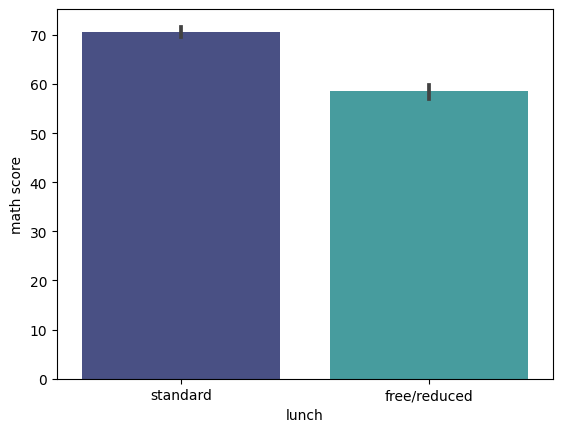

In [17]:
sns.barplot(x="lunch", y="math score",data=df,palette="mako");

In [18]:
lbe=LabelEncoder()

In [19]:
df["new gender"]=lbe.fit_transform(df["gender"])
df["new race/ethnicity"]=lbe.fit_transform(df["race/ethnicity"])
df["new test preparation course"]=lbe.fit_transform(df["test preparation course"])
df["new lunch"]=lbe.fit_transform(df["lunch"])
df["new parental level of education"]=lbe.fit_transform(df["parental level of education"])

In [20]:
df_mod=df.drop(["gender","race/ethnicity","parental level of education","lunch","test preparation course"],axis=1)

In [21]:
y = df_mod["math score"]
X = df_mod.drop(['math score',"reading score","writing score"], axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30,
                                                    random_state=42)


In [23]:
mlp_model = MLPRegressor().fit(X_train, y_train)


In [ ]:
mlp_params = {'alpha': np.arange(0.1, 1, 0.1),
              'hidden_layer_sizes': [(20, 20), (40, 40, 40), (80, 80), (70, 70), (50, 50), (60, 60)]}
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)
mlp_cv_model.fit(X_train, y_train)
mlp_cv_model.best_params_


: 

In [ ]:
mlp_tuned = MLPRegressor(alpha = 0.30000000000000004, hidden_layer_sizes = (40,40,40))

: 

In [ ]:
mlp_tuned.fit(X_train, y_train)

y_pred = mlp_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))


: 

In [ ]:
df_mod["math score"].mean()

y_pred_rf1 = pd.DataFrame({"actual": y_test,
                           "predicted_prob": mlp_tuned.predict(
                               (X_test))})
y_pred_rf1


: 